# Proyek Analisis Data: [E Commerce]
- **Nama:** [Muhammad Izzuddin Al Fatih]
- **Email:** [alfatih.cipondoh@gmail.com]
- **ID Dicoding:** [MC299D5Y1327]

## Menentukan Pertanyaan Bisnis

- Produk kategori apa yang memiliki penjualan tertinggi dan terendah?
- Bagaimana hubungan antara metode pembayaran dan total nilai transaksi?

## Import Semua Packages/Library yang Digunakan

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

## Data Wrangling

### Gathering Data

**Orders**

membaca dataset orders

In [52]:
orders = pd.read_csv('data/orders_dataset.csv')
orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

membaca dataset order items

In [53]:
order_items = pd.read_csv('data/order_items_dataset.csv')
order_items.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

membaca dataset order payments

In [54]:
order_payments = pd.read_csv('data/order_payments_dataset.csv')
order_payments.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

membaca order review dataset

In [55]:
order_reviews = pd.read_csv('data/order_reviews_dataset.csv')
order_reviews.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

**customers**

membaca customers dataset

In [56]:
customers = pd.read_csv('data/customers_dataset.csv')
customers.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

**geolocation**

membaca dataset geolocation

In [57]:
geolocation = pd.read_csv('data/geolocation_dataset.csv')
geolocation.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

**Profucts**

membaca dataset products

In [58]:
products = pd.read_csv('data/products_dataset.csv')
products.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

In [59]:
product_category_name_translation = pd.read_csv('data/product_category_name_translation.csv')
product_category_name_translation.head()

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

**Sellers**

membaca dataset sellers

In [60]:
sellers = pd.read_csv('data/sellers_dataset.csv')
sellers.head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

**Insight:**
- memastikan dataset dapat dimuat
- memeriksa struktur tiap dataset

### Assessing Data

membaca informasi umum dan juga missing value tiap data

In [61]:
# Mengecek informasi dataset
datasets = {
    "orders": orders,
    "order_items": order_items,
    "order_payments": order_payments,
    "order_reviews": order_reviews,
    "customers": customers,
    "geolocation": geolocation,
    "products": products,
    "sellers": sellers
}

for name, dataset in datasets.items():
    print(f"\n--- {name.upper()} ---")
    print(dataset.info())
    print("Missing Values:\n", dataset.isnull().sum())
    print("-" * 40)



--- ORDERS ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None
Missing Values:
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1

mengcek duplikasi tiap data

In [62]:
for name, dataset in datasets.items():
    duplicate_count = dataset.duplicated().sum()
    print(f"{name}: {duplicate_count} duplikasi ditemukan")

orders: 0 duplikasi ditemukan
order_items: 0 duplikasi ditemukan
order_payments: 0 duplikasi ditemukan
order_reviews: 0 duplikasi ditemukan
customers: 0 duplikasi ditemukan
geolocation: 261831 duplikasi ditemukan
products: 0 duplikasi ditemukan
sellers: 0 duplikasi ditemukan


melihat unique value tiap data

In [63]:
for name, dataset in datasets.items():
    print(f"\n--- {name.upper()} ---")
    print(dataset.nunique())
    print("-" * 40)


--- ORDERS ---
order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64
----------------------------------------

--- ORDER_ITEMS ---
order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64
----------------------------------------

--- ORDER_PAYMENTS ---
order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64
----------------------------------------

--- ORDER_REVIEWS ---
review_id                  98410
order_id                   98673
review_score           

**gamabaran data**

melihat statistik dataset orders

In [64]:
orders.describe()

order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   
freq                                   1                                 1   

       order_status order_purchase_timestamp    order_approved_at  \
count         99441                    99441                99281   
unique            8                    98875                90733   
top       delivered      2018-08-02 12:05:26  2018-02-27 04:31:10   
freq          96478                        3                    9   

       order_delivered_carrier_date order_delivered_customer_date  \
count                         97658                         96476   
unique                        81018                         95664   
top             2018-05-09 15:48:00           2018-05-08 19:36:48   
freq                             47                             3   

       order_estimated_delivery_date  
count                          99441  
unique                           459  
top              2017-12-20 00:00:00  
freq                             522

melihat statistik dataset order_reviews

In [65]:
order_reviews.describe(include='all')

review_id                          order_id  \
count                              99224                             99224   
unique                             98410                             98673   
top     08528f70f579f0c830189efc523d2182  df56136b8031ecd28e200bb18e6ddb2e   
freq                                   3                                 3   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        review_score review_comment_title review_comment_message  \
count   99224.000000                11568                  40977   
unique           NaN                 4527                  36159   
top              NaN            Recomendo              Muito bom   
freq             NaN                  423                    230   
mean        4.086421                  NaN                    NaN   
std         1.347579                  NaN                    NaN   
min         1.000000                  NaN                    NaN   
25%         4.000000                  NaN                    NaN   
50%         5.000000                  NaN                    NaN   
75%         5.000000                  NaN                    NaN   
max         5.000000                  NaN                    NaN   

       review_creation_date review_answer_timestamp  
count                 99224                   99224  
unique                  636                   98248  
top     2017-12-19 00:00:00     2017-06-15 23:21:05  
freq                    463                       4  
mean                    NaN                     NaN  
std                     NaN                     NaN  
min                     NaN                     NaN  
25%                     NaN                     NaN  
50%                     NaN                     NaN  
75%                     NaN                     NaN  
max                     NaN                     NaN

melihat statistik dataset order_payments

In [66]:
order_payments.describe()

payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%              1.000000              4.000000     171.837500
max             29.000000             24.000000   13664.080000

melihat statistik dataset order_items

In [67]:
order_items.describe()

order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000      16.260000
75%         1.000000     134.900000      21.150000
max        21.000000    6735.000000     409.680000

melihat statistik dataset customers

In [68]:
customers.describe(include='all')

customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     274fa6071e5e17fe303b9748641082c8  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_code_prefix customer_city customer_state  
count               99441.000000         99441          99441  
unique                       NaN          4119             27  
top                          NaN     sao paulo             SP  
freq                         NaN         15540          41746  
mean                35137.474583           NaN            NaN  
std                 29797.938996           NaN            NaN  
min                  1003.000000           NaN            NaN  
25%                 11347.000000           NaN            NaN  
50%                 24416.000000           NaN            NaN  
75%                 58900.000000           NaN            NaN  
max                 99990.000000           NaN            NaN

melihat statistik dataset geolocation

In [69]:
geolocation.describe()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                 1.000163e+06     1.000163e+06     1.000163e+06
mean                  3.657417e+04    -2.117615e+01    -4.639054e+01
std                   3.054934e+04     5.715866e+00     4.269748e+00
min                   1.001000e+03    -3.660537e+01    -1.014668e+02
25%                   1.107500e+04    -2.360355e+01    -4.857317e+01
50%                   2.653000e+04    -2.291938e+01    -4.663788e+01
75%                   6.350400e+04    -1.997962e+01    -4.376771e+01
max                   9.999000e+04     4.506593e+01     1.211054e+02

melihat statistik dataset products

In [70]:
products.describe()

product_name_lenght  product_description_lenght  product_photos_qty  \
count         32341.000000                32341.000000        32341.000000   
mean             48.476949                  771.495285            2.188986   
std              10.245741                  635.115225            1.736766   
min               5.000000                    4.000000            1.000000   
25%              42.000000                  339.000000            1.000000   
50%              51.000000                  595.000000            1.000000   
75%              57.000000                  972.000000            3.000000   
max              76.000000                 3992.000000           20.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count      32949.000000       32949.000000       32949.000000   
mean        2276.472488          30.815078          16.937661   
std         4282.038731          16.914458          13.637554   
min            0.000000           7.000000           2.000000   
25%          300.000000          18.000000           8.000000   
50%          700.000000          25.000000          13.000000   
75%         1900.000000          38.000000          21.000000   
max        40425.000000         105.000000         105.000000   

       product_width_cm  
count      32949.000000  
mean          23.196728  
std           12.079047  
min            6.000000  
25%           15.000000  
50%           20.000000  
75%           30.000000  
max          118.000000

melihat statistik dataset sellers

In [71]:
sellers.describe()

seller_zip_code_prefix
count             3095.000000
mean             32291.059451
std              32713.453830
min               1001.000000
25%               7093.500000
50%              14940.000000
75%              64552.500000
max              99730.000000

In [72]:
print(order_payments.duplicated().sum())  
print(customers.duplicated().sum())


0
0


### Cleaning Data

mengubah tipe data objek dari "orders_columns" menjadi datetime

In [73]:
orders_columns = [
    'order_purchase_timestamp', 
    'order_approved_at', 
    'order_delivered_carrier_date', 
    'order_delivered_customer_date', 
    'order_estimated_delivery_date'
]

for col in orders_columns:
    orders[col] = pd.to_datetime(orders[col], errors='coerce')

    orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  object        
 7   order_estimated_delivery_date  99441 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 6.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dty

In [74]:
order_reviews_columns = [
    'review_creation_date',
    'review_answer_timestamp'
]

for col in order_reviews_columns:
    order_reviews[col] = pd.to_datetime(order_reviews[col], errors='coerce')

    order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 5.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null

In [75]:
order_items_columns = [
    'shipping_limit_date'
]

for col in order_items_columns:
    order_items[col] = pd.to_datetime(order_items[col], errors='coerce')

    order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [76]:
products['product_name_lenght'] = products['product_name_lenght'].astype('Int64')
products['product_description_lenght'] = products['product_description_lenght'].astype('Int64')
products['product_photos_qty'] = products['product_photos_qty'].astype('Int64')

products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  Int64  
 3   product_description_lenght  32341 non-null  Int64  
 4   product_photos_qty          32341 non-null  Int64  
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: Int64(3), float64(4), object(2)
memory usage: 2.4+ MB


mengisi bagian products

In [77]:
order_reviews.ffill(inplace=True)
order_reviews.isnull().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       9
review_comment_message     3
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [78]:
products.ffill(inplace=True)
products.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

membersihkan data duplikat di geolocation

In [79]:
geolocation.drop_duplicates(inplace=True)
geolocation.duplicated().sum()

np.int64(0)

## Exploratory Data Analysis (EDA)

### Explore ...

In [80]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32951 non-null  Int64  
 3   product_description_lenght  32951 non-null  Int64  
 4   product_photos_qty          32951 non-null  Int64  
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: Int64(3), float64(4), object(2)
memory usage: 2.4+ MB


In [81]:
product_sales_df = pd.merge(
    left=order_items,  # Data penjualan
    right=products,  # Data produk
    how="left",
    left_on="product_id",
    right_on="product_id"
)

In [82]:
sales_by_category = product_sales_df.groupby("product_category_name")["order_id"].count().reset_index()
sales_by_category = sales_by_category.rename(columns={"order_id": "total_sales"})
sales_by_category = sales_by_category.sort_values(by="total_sales", ascending=False)  # Urutkan dari tertinggi ke terendah

In [83]:
highest_selling = sales_by_category.head(5)  # 5 kategori produk teratas
lowest_selling = sales_by_category.tail(5)  # 5 kategori produk terbawah

print("Kategori Produk dengan Penjualan Tertinggi:")
print(highest_selling)

print("\nKategori Produk dengan Penjualan Terendah:")
print(lowest_selling)

Kategori Produk dengan Penjualan Tertinggi:
     product_category_name  total_sales
13         cama_mesa_banho        11249
11            beleza_saude         9818
32           esporte_lazer         8730
54        moveis_decoracao         8475
44  informatica_acessorios         7850

Kategori Produk dengan Penjualan Terendah:
            product_category_name  total_sales
17              cds_dvds_musicais           14
46                     la_cuisine           14
60                       pc_gamer            9
37  fashion_roupa_infanto_juvenil            8
67             seguros_e_servicos            2


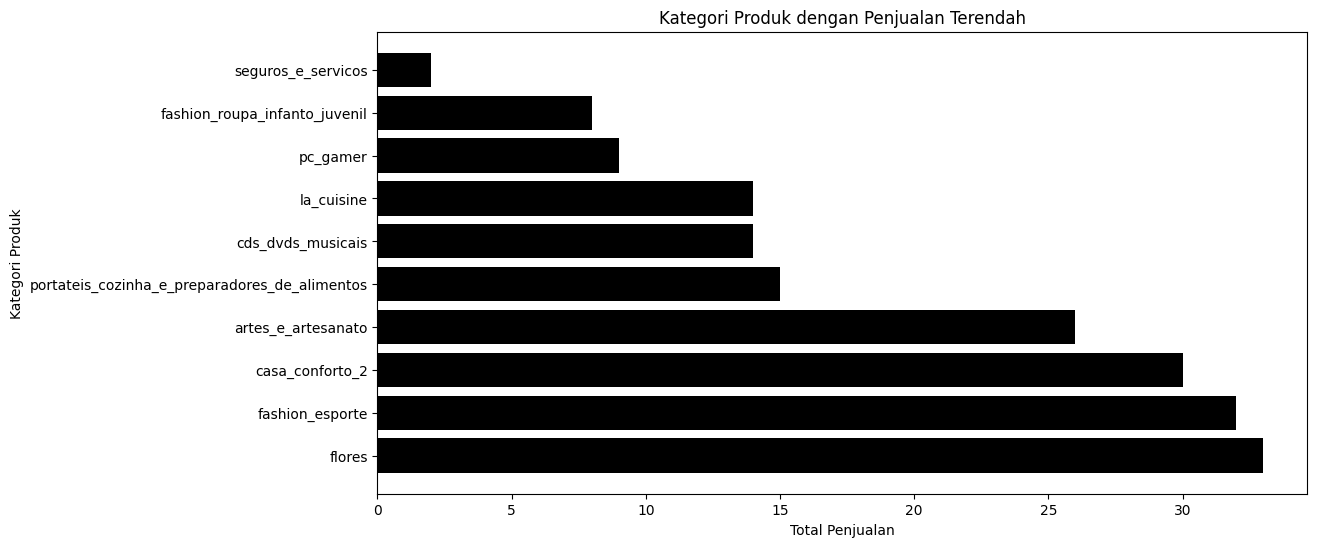

In [84]:
plt.figure(figsize=(12, 6))
plt.barh(sales_by_category["product_category_name"].tail(10), sales_by_category["total_sales"].tail(10), color="black")
plt.xlabel("Total Penjualan")
plt.ylabel("Kategori Produk")
plt.title("Kategori Produk dengan Penjualan Terendah")
plt.show()

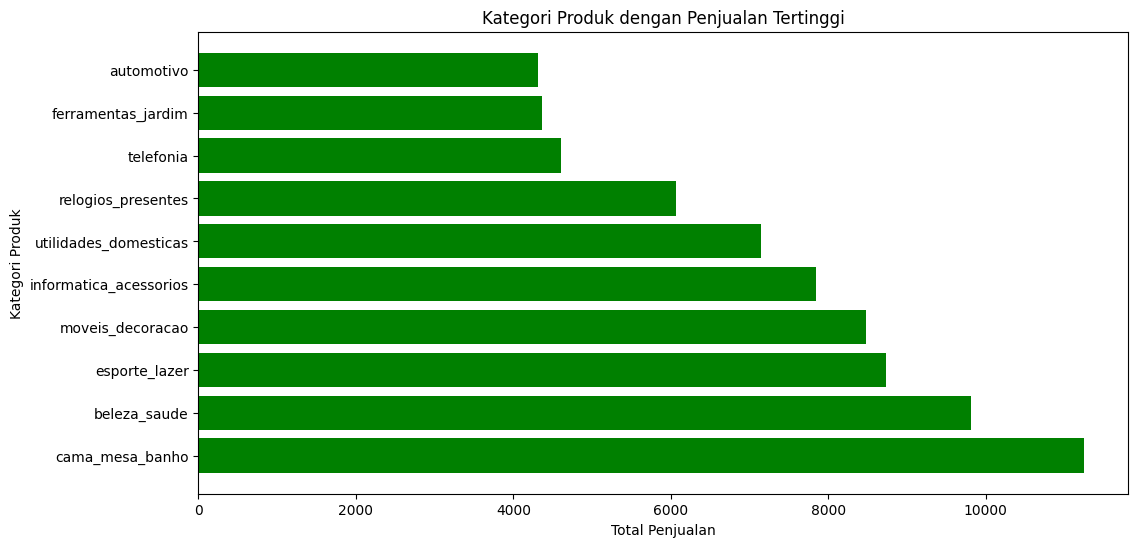

In [85]:
plt.figure(figsize=(12, 6))
plt.barh(sales_by_category["product_category_name"].head(10), sales_by_category["total_sales"].head(10), color="green")
plt.xlabel("Total Penjualan")
plt.ylabel("Kategori Produk")
plt.title("Kategori Produk dengan Penjualan Tertinggi")
plt.show()

data order

In [86]:
order_items

order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       00018f77f2f0320c557190d7a144bdd3              1   
2       000229ec398224ef6ca0657da4fc703e              1   
3       00024acbcdf0a6daa1e931b038114c75              1   
4       00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                  ...            ...   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647  fffce4705a9662cd70adb13d4a31832d              1   
112648  fffe18544ffabc95dfada21779c9644f              1   
112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2       c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3       7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4       ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   
...                                  ...                               ...   
112645  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
112646  32e07fd915822b0765e448c4dd74c828  f3c38ab652836d21de61fb8314b69182   
112647  72a30483855e2eafc67aee5dc2560482  c3cfdc648177fdbbbb35635a37472c53   
112648  9c422a519119dcad7575db5af1ba540e  2b3e4a2a3ea8e01938cabda2a3e5cc79   
112649  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1   

       shipping_limit_date   price  freight_value  
0      2017-09-19 09:45:35   58.90          13.29  
1      2017-05-03 11:05:13  239.90          19.93  
2      2018-01-18 14:48:30  199.00          17.87  
3      2018-08-15 10:10:18   12.99          12.79  
4      2017-02-13 13:57:51  199.90          18.14  
...                    ...     ...            ...  
112645 2018-05-02 04:11:01  299.99          43.41  
112646 2018-07-20 04:31:48  350.00          36.53  
112647 2017-10-30 17:14:25   99.90          16.95  
112648 2017-08-21 00:04:32   55.99           8.72  
112649 2018-06-12 17:10:13   43.00          12.79  

[112650 rows x 7 columns]

In [87]:
order_product = pd.merge(order_reviews, order_items, on="order_id")
order_product = pd.merge(order_product, products, on="product_id")
order_product = pd.merge(order_product, product_category_name_translation, on="product_category_name")
order_product

review_id                          order_id  \
0       7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1       7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
2       80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
3       228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
4       e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
...                                  ...                               ...   
112343  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
112344  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
112345  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
112346  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
112347  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

        review_score review_comment_title  \
0                  4                  NaN   
1                  4                  NaN   
2                  5                  NaN   
3                  5                  NaN   
4                  5                  NaN   
...              ...                  ...   
112343             5       Foto enganosa    
112344             5       Foto enganosa    
112345             5       Foto enganosa    
112346             4       Foto enganosa    
112347             1       Foto enganosa    

                                   review_comment_message  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4                   Recebi bem antes do prazo estipulado.   
...                                                   ...   
112343  O produto não foi enviado com NF, não existe v...   
112344  O produto não foi enviado com NF, não existe v...   
112345  Excelente mochila, entrega super rápida. Super...   
112346  Excelente mochila, entrega super rápida. Super...   
112347  meu produto chegou e ja tenho que devolver, po...   

       review_creation_date review_answer_timestamp  order_item_id  \
0                2018-01-18     2018-01-18 21:46:59              1   
1                2018-01-18     2018-01-18 21:46:59              2   
2                2018-03-10     2018-03-11 03:05:13              1   
3                2018-02-17     2018-02-18 14:36:24              1   
4                2017-04-21     2017-04-21 22:02:06              1   
...                     ...                     ...            ...   
112343           2018-07-07     2018-07-14 17:18:30              1   
112344           2017-12-09     2017-12-11 20:06:42              1   
112345           2018-03-22     2018-03-23 09:10:43              1   
112346           2018-07-01     2018-07-02 12:59:13              1   
112347           2017-07-03     2017-07-03 21:01:49              1   

                              product_id                         seller_id  \
0       fd25ab760bfbba13c198fa3b4f1a0cd3  6d803cb79cc31c41c4c789a75933b3c7   
1       fd25ab760bfbba13c198fa3b4f1a0cd3  6d803cb79cc31c41c4c789a75933b3c7   
2       be0dbdc3d67d55727a65d4cd696ca73c  8e6d7754bc7e0f22c96d255ebda59eba   
3       d1c427060a0f73f6b889a5c7c61f2ac4  a1043bafd471dff536d0c462352beb48   
4       52c80cedd4e90108bf4fa6a206ef6b03  a1043bafd471dff536d0c462352beb48   
...                                  ...                               ...   
112343  4fb209073dc2ab6a6d3c259a7c285501  5343d0649eca2a983820bfe93fc4d17e   
112344  3a33c980b62eb1ef3b8ae61b6fc6fe55  46dc3b2cc0980fb8ec44634e21d2718e   
112345  8ba0118a487ec8671aed57e5ef846574  17ca9b9e9b9ef8fdb529001b49ebb50f   
112346  73a7fbf8c1048131f3b531af31bcdf0e  8d956fec2e4337affcb520f56fd8cbfd   
112347  8fbd36d3b045f5f38b252b1513478f38  7e3f87d16fb353f408d467e74fbd8014   

        ... freight_value   product_catego

In [88]:
order_product.groupby("product_category_name_english")["order_item_id"].count().sort_values(ascending=False)

product_category_name_english
bed_bath_table               11270
health_beauty                 9793
sports_leisure                8731
furniture_decor               8473
computers_accessories         7873
                             ...  
arts_and_craftmanship           26
cds_dvds_musicals               14
la_cuisine                      13
fashion_childrens_clothes        8
security_and_services            2
Name: order_item_id, Length: 71, dtype: int64

disini terlihat bahwa produk bed_bath_table memiliki penjualan yang tinggi, sedangkang security_and_service memiliki penjualan terendah

In [89]:
order_payments.info()
order_payments.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [90]:
payment_counts = order_payments["payment_type"].value_counts()
print(payment_counts)

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64


*Mayoritas pelanggan menggunakan kartu kredit, sementara boleto (sistem pembayaran di Brasil mirip transfer bank) juga cukup banyak digunakan*

In [91]:
payment_summary = order_payments.groupby("payment_type")["payment_value"].sum().reset_index()
print(payment_summary)

  payment_type  payment_value
0       boleto     2869361.27
1  credit_card    12542084.19
2   debit_card      217989.79
3  not_defined           0.00
4      voucher      379436.87


*Kartu kredit memiliki total nilai transaksi tertinggi, sedangkan metode lain jauh lebih kecil*

In [92]:
payment_stats = order_payments.groupby("payment_type")["payment_value"].describe()
print(payment_stats)

                count        mean         std    min      25%     50%  \
payment_type                                                            
boleto        19784.0  145.034435  213.581061  11.62  55.5225   93.89   
credit_card   76795.0  163.319021  222.119311   0.01  62.2100  106.87   
debit_card     1529.0  142.570170  245.793401  13.38  51.1000   89.30   
not_defined       3.0    0.000000    0.000000   0.00   0.0000    0.00   
voucher        5775.0   65.703354  115.519185   0.00  18.0350   39.28   

                   75%       max  
payment_type                      
boleto        160.7625   7274.88  
credit_card   181.2100  13664.08  
debit_card    154.3200   4445.50  
not_defined     0.0000      0.00  
voucher        80.0000   3184.34  


*- Transaksi kartu kredit memiliki nilai rata-rata tertinggi dan variasi terbesar,
    menunjukkan ada pelanggan yang melakukan pembayaran dalam jumlah besar.*

*- Voucher memiliki transaksi rata-rata kecil, menunjukkan penggunaannya lebih untuk diskon atau subsidi kecil*

In [93]:
merged_payment = pd.merge(order_payments, orders, on="order_id", how="inner")

print(merged_payment.info())
print(merged_payment.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       103886 non-null  object        
 1   payment_sequential             103886 non-null  int64         
 2   payment_type                   103886 non-null  object        
 3   payment_installments           103886 non-null  int64         
 4   payment_value                  103886 non-null  float64       
 5   customer_id                    103886 non-null  object        
 6   order_status                   103886 non-null  object        
 7   order_purchase_timestamp       103886 non-null  datetime64[ns]
 8   order_approved_at              103711 non-null  datetime64[ns]
 9   order_delivered_carrier_date   101998 non-null  datetime64[ns]
 10  order_delivered_customer_date  100754 non-null  datetime64[ns]
 11  

## Visualization & Explanatory Analysis

### Pertanyaan 1:

- Produk kategori apa yang memiliki penjualan tertinggi dan terendah?

In [94]:
order_items.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

  shipping_limit_date   price  freight_value  
0 2017-09-19 09:45:35   58.90          13.29  
1 2017-05-03 11:05:13  239.90          19.93  
2 2018-01-18 14:48:30  199.00          17.87  
3 2018-08-15 10:10:18   12.99          12.79  
4 2017-02-13 13:57:51  199.90          18.14

In [95]:
merged_order_product = pd.merge(order_items, products, on="product_id")
merged_order_product = pd.merge(merged_order_product, product_category_name_translation, on="product_category_name")
merged_order_product.head()


order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

  shipping_limit_date   price  freight_value product_category_name  \
0 2017-09-19 09:45:35   58.90          13.29            cool_stuff   
1 2017-05-03 11:05:13  239.90          19.93              pet_shop   
2 2018-01-18 14:48:30  199.00          17.87      moveis_decoracao   
3 2018-08-15 10:10:18   12.99          12.79            perfumaria   
4 2017-02-13 13:57:51  199.90          18.14    ferramentas_jardim   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                   58                         598                   4   
1                   56                         239                   2   
2                   59                         695                   2   
3                   42                         480                   1   
4                   59                         409                   1   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             650.0               28.0                9.0              14.0   
1           30000.0               50.0               30.0              40.0   
2            3050.0               33.0               13.0              33.0   
3             200.0               16.0               10.0              15.0   
4            3750.0               35.0               40.0              30.0   

  product_category_name_english  
0                    cool_stuff  
1                      pet_shop  
2               furniture_decor  
3                     perfumery  
4                  garden_tools

In [96]:
sales_per_category = merged_order_product.groupby("product_category_name_english")["order_item_id"].sum()
sales_per_category = sales_per_category.sort_values(ascending=False).reset_index()
sales_per_category.rename(columns={"product_category_name_english": "name_product", "order_item_id": "terjual"}, inplace=True)
sales_per_category


name_product  terjual
0              bed_bath_table    13828
1             furniture_decor    11697
2               health_beauty    11249
3              sports_leisure    10034
4       computers_accessories     9900
..                        ...      ...
66      arts_and_craftmanship       28
67                 la_cuisine       16
68          cds_dvds_musicals       16
69  fashion_childrens_clothes        8
70      security_and_services        2

[71 rows x 2 columns]

C:\Users\Al Fatih\AppData\Local\Temp\ipykernel_10720\2666060719.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Al Fatih\AppData\Local\Temp\ipykernel_10720\2666060719.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


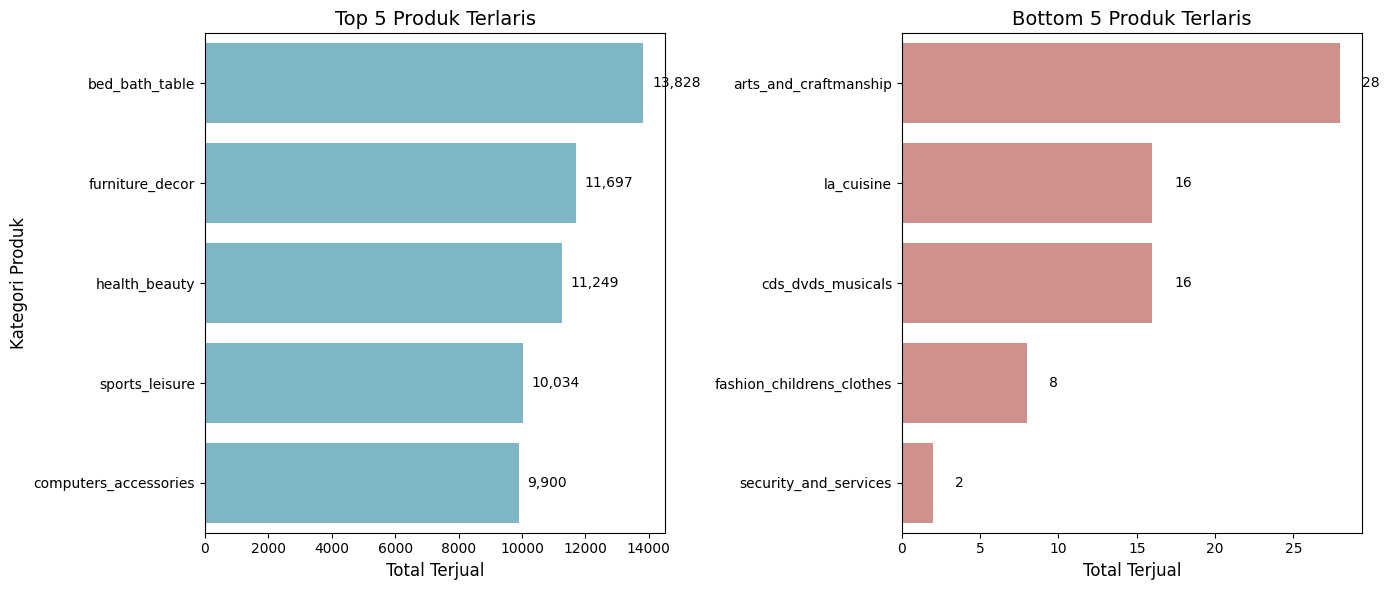

In [97]:
top_5_products = sales_per_category.head(5)
bottom_5_products = sales_per_category.tail(5)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

top_colors = ["#72BCD4"] * 5
bottom_colors = ["#D98880"] * 5

sns.barplot(
    x="terjual", y="name_product",
    data=top_5_products, palette=top_colors, ax=axes[0]
)
axes[0].set_title("Top 5 Produk Terlaris", fontsize=14)
axes[0].set_xlabel("Total Terjual", fontsize=12)
axes[0].set_ylabel("Kategori Produk", fontsize=12)

for index, value in enumerate(top_5_products["terjual"]):
    axes[0].text(value + max(top_5_products["terjual"]) * 0.02, index, f"{value:,}", va="center", fontsize=10)

sns.barplot(
    x="terjual", y="name_product",
    data=bottom_5_products, palette=bottom_colors, ax=axes[1]
)
axes[1].set_title("Bottom 5 Produk Terlaris", fontsize=14)
axes[1].set_xlabel("Total Terjual", fontsize=12)
axes[1].set_ylabel("")

for index, value in enumerate(bottom_5_products["terjual"]):
    axes[1].text(value + max(bottom_5_products["terjual"]) * 0.05, index, f"{value:,}", va="center", fontsize=10)

plt.tight_layout()
plt.show()


### Pertanyaan 2:

- Bagaimana hubungan antara metode pembayaran dan total nilai transaksi?

C:\Users\Al Fatih\AppData\Local\Temp\ipykernel_10720\1163538714.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


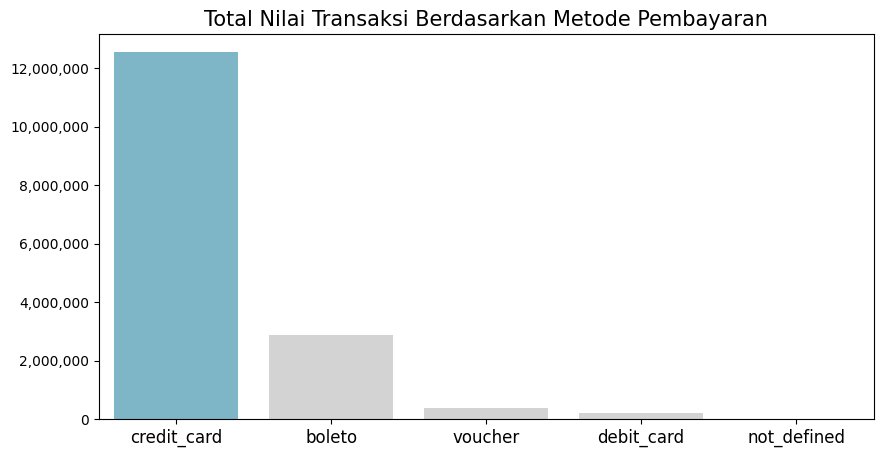

In [98]:
payment_summary = order_payments.groupby("payment_type")["payment_value"].sum().reset_index()
payment_summary["payment_type"] = pd.Categorical(
    payment_summary["payment_type"],
    ["credit_card", "boleto", "voucher", "debit_card", "not_defined"]
)

colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(10, 5))
ax = sns.barplot(
    x="payment_type",
    y="payment_value",
    data=payment_summary.sort_values(by="payment_value", ascending=False),
    palette=colors_
)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.title("Total Nilai Transaksi Berdasarkan Metode Pembayaran", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

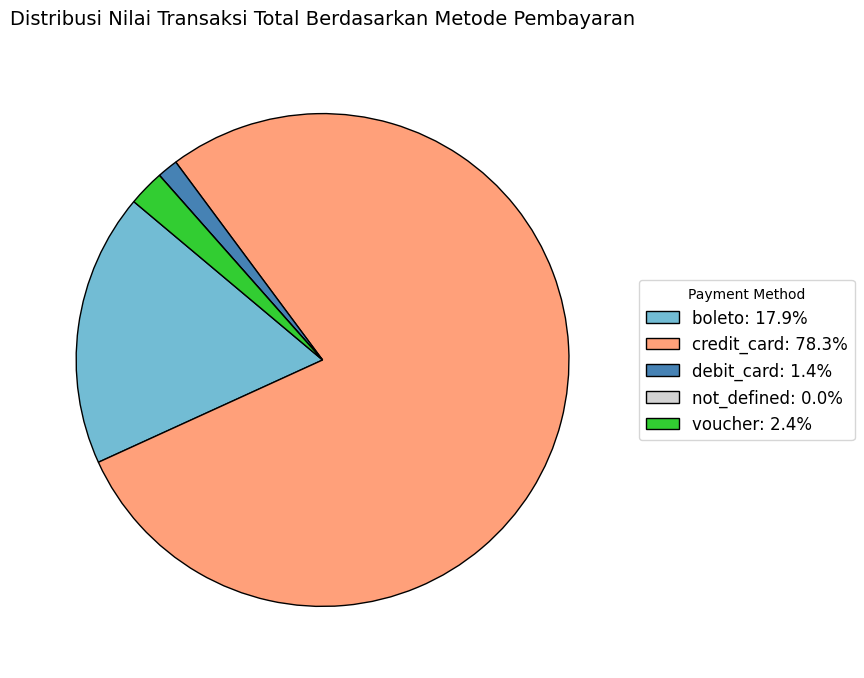

In [99]:
payment_summary = order_payments.groupby("payment_type")["payment_value"].sum().reset_index()
colors_ = ["#72BCD4", "#FFA07A", "#4682B4", "#D3D3D3", "#32CD32"]
payment_summary["percentage"] = (payment_summary["payment_value"] / payment_summary["payment_value"].sum()) * 100

plt.figure(figsize=(8, 8))
wedges, texts = plt.pie(
    payment_summary["payment_value"], 
    labels=None,
    colors=colors_,
    startangle=140, 
    wedgeprops={'edgecolor': 'black'}
)
legend_labels = [f"{ptype}: {pval:.1f}%" for ptype, pval in zip(payment_summary["payment_type"], payment_summary["percentage"])]
plt.legend(wedges, legend_labels, title="Payment Method", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12)
plt.title("Distribusi Nilai Transaksi Total Berdasarkan Metode Pembayaran", fontsize=14, pad=20)
plt.show()

In [100]:
orders = pd.read_csv(r'D:\dicoding\dataDBS\coding\data\orders_dataset.csv')
customers = pd.read_csv(r'D:\dicoding\dataDBS\coding\data\customers_dataset.csv')

orders_customers = pd.merge(orders, customers, on='customer_id', how='inner')

print(orders_customers.head())
print(f"Total baris hasil merge: {len(orders_customers)}")

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08

In [101]:
order_items = pd.read_csv(r'D:\dicoding\dataDBS\coding\data\order_items_dataset.csv')

# Top 5 produk terlaris
top_products = order_items['product_id'].value_counts().head(5)
print("Top 5 Produk Terlaris:\n", top_products)

Top 5 Produk Terlaris:
 product_id
aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
Name: count, dtype: int64


In [ ]:
order_items = pd.read_csv(r'D:\dicoding\dataDBS\coding\data\order_items_dataset.csv')
products = pd.read_csv(r'D:\dicoding\dataDBS\coding\data\products_dataset.csv')
orders = pd.read_csv(r'D:\dicoding\dataDBS\coding\data\orders_dataset.csv')
customers = pd.read_csv(r'D:\dicoding\dataDBS\coding\data\customers_dataset.csv')
sellers = pd.read_csv(r'D:\dicoding\dataDBS\coding\data\sellers_dataset.csv')

merged_df = pd.merge(order_items, products, on='product_id', how='left')

merged_df = pd.merge(merged_df, orders, on='order_id', how='left')

merged_df = pd.merge(merged_df, customers, on='customer_id', how='left')

merged_df = pd.merge(merged_df, sellers, on='seller_id', how='left')

print(merged_df.head())
print(f"Total baris final: {len(merged_df)}")

                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value product_category_name  \
0  2017-09-19 09:45:35   58.90          13.29            cool_stuff   
1  2017-05-03 11:05:13  239.90          19.93              pet_shop   
2  2018-01-18 14:48:30 

## Conclusion

- Produk kategori apa yang memiliki penjualan tertinggi dan terendah?
    kategori produk dengan penjualan tertinggi berasal dari bed_bath_table dengan total penjualan sebanyak 13828 kal
    Sebaliknya, kategori dengan penjualan terendah adalah security_and_services, dengan total penjualan hanya 2 kali, dari data diatas prusahaan bisa menganalisis mengapa produk itu tidak begitu laku dan setelah tahu pengembang bisa membuat inovasi baru untuk membantu penjualan porduk, dan untuk produk yang berada di puncak penjualan bisa terus di tingkatkan performanya, jangan sampai terlalu fokus untuk memperbaiki produk terndah sampai lupa menjaga ke stabilan harga jual barang terlaris

- Bagaimana hubungan antara metode pembayaran dan total nilai transaksi?
    Berdasarkan hasil analisis, metode pembayaran paling dominan dalam transaksi e-commerce ini adalah Credit Card (kartu kredit), dengan total nilai transaksi mencapai Rp12.542.084,19 atau 78.3% dari keseluruhan metode pembayaran. Hal ini menunjukkan bahwa sebagian besar pelanggan lebih memilih menggunakan kartu kredit sebagai metode utama dalam bertransaksi, baik karena kemudahan, kecepatan, atau adanya promo cashback, diskon, dan cicilan. Mengingat mayoritas transaksi menggunakan kartu kredit, perusahaan bisa meningkatkan kemitraan dengan bank untuk menyediakan promo eksklusif, cicilan 0%, atau cashback yang dapat menarik lebih banyak pelanggan.
    